## Stock Markets

### Internal Library
Using [Alpha Vantage](https://www.alphavantage.co/). Free : 5 API requests per minute; 500 API requests per day. Use library function to use the cache/pickle as much as possible, to avoid exceeding free quote quota 
- https://www.alphavantage.co/documentation/ 
- https://en.wikipedia.org/wiki/List_of_S%26P_500_companies
- https://github.com/twopirllc/pandas-ta/blob/master/examples/AIExample.ipynb

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rcParams['figure.figsize'] = [20, 10]

In [2]:
pd.read_csv('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=IBM&apikey=demo&datatype=csv',index_col=0)

,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
timestamp,,,,,,,,
2022-09-06,127.80,128.0600,126.30,126.72,126.720000,3345343,0.0,1.0
2022-09-02,130.30,130.5600,127.24,127.79,127.790000,3040813,0.0,1.0
2022-09-01,128.40,129.8173,127.74,129.66,129.660000,3396219,0.0,1.0
2022-08-31,129.92,130.0000,128.40,128.45,128.450000,3490380,0.0,1.0
2022-08-30,130.56,130.7700,129.29,129.58,129.580000,2407888,0.0,1.0
...,...,...,...,...,...,...,...,...
2022-04-20,135.00,139.5600,133.38,138.32,134.923462,17770306,0.0,1.0
2022-04-19,126.08,129.4000,126.00,129.15,125.978638,7971361,0.0,1.0
2022-04-18,126.60,127.3899,125.53,126.17,123.071814,4884150,0.0,1.0


### WGET
Instead of hitting alphavantage everytime, we cache it in **wdata.AVGet()**

In [3]:
import wdata
abt = wdata.AVGet('ABT')
ibm = wdata.AVGet('IBM')

SyntaxError: cannot assign to operator (wdata.py, line 11)

<AxesSubplot:xlabel='timestamp'>

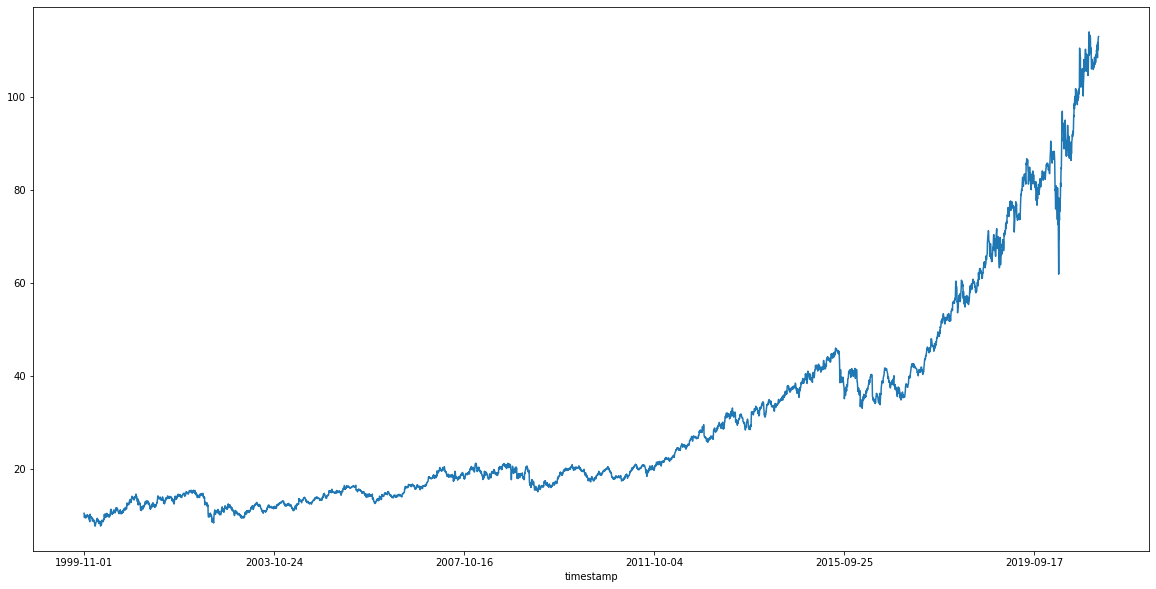

In [4]:
abt.iloc[::-1]['adjusted_close'].plot() # Time Series is reversed, [::-1] to reverse it

[FB] retrieved from cache. Size=2183, Columns=['open' 'high' 'low' 'close' 'adjusted_close' 'volume' 'dividend_amount'
 'split_coefficient']


<AxesSubplot:xlabel='timestamp'>

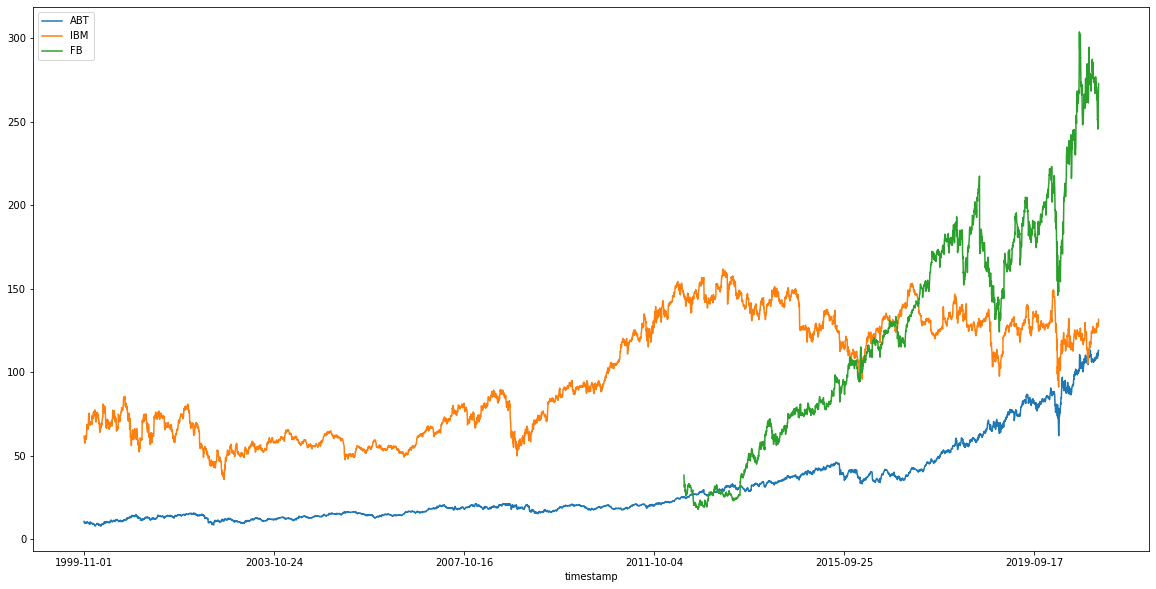

In [5]:
df1 = abt[['adjusted_close']].rename(columns={'adjusted_close': 'ABT'})
df1['IBM'] = ibm['adjusted_close']
df1['FB'] = wdata.AVGet('FB')['adjusted_close']
df1[::-1].plot()

In [7]:
#import talib 
#abt['MA'] = talib.SMA(abt['adjusted_close'],100)

<AxesSubplot:xlabel='timestamp'>

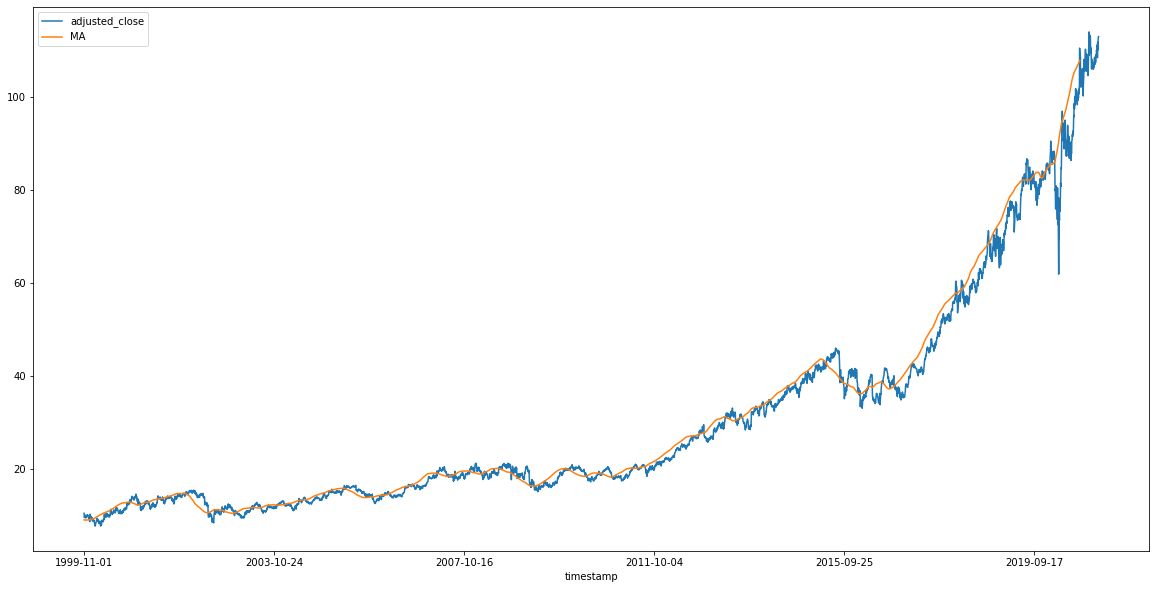

In [13]:
abt[::-1][['adjusted_close','MA']].plot()

## Pandas-TA
- https://github.com/twopirllc/pandas-ta
- https://github.com/twopirllc/pandas-ta/blob/master/examples/AIExample.ipynb
- pip install alphaVantage-api
- pip install pandas-ta

In [8]:
import pandas_ta as ta

asset = abt[:400][::-1].copy()

asset.ta.adjusted = "adjusted_close"
asset.ta.ema(length=8, append=True)
asset.ta.ema(length=21, append=True)
asset.ta.ema(length=50, append=True)

asset[asset.columns[5:]].tail()

,volume,dividend_amount,split_coefficient,EMA_8,EMA_21,EMA_50
timestamp,,,,,,
2021-01-14,4391349,0.45,1.0,110.363752,109.571322,108.786776
2021-01-15,4480173,0.00,1.0,110.571807,109.728475,108.885334
2021-01-19,6820328,0.00,1.0,111.015850,109.986795,109.029831
2021-01-20,2952325,0.00,1.0,111.432328,110.250723,109.181210
2021-01-21,5006497,0.00,1.0,111.769588,110.496112,109.329006


In [9]:
print(asset.ta.ema(length=2, append=False).head(5))
print(asset.close.head(5))

timestamp
2019-06-21          NaN
2019-06-24    84.855000
2019-06-25    84.445000
2019-06-26    83.455000
2019-06-27    83.611667
Name: EMA_2, dtype: float64
timestamp
2019-06-21    85.00
2019-06-24    84.71
2019-06-25    84.24
2019-06-26    82.96
2019-06-27    83.69
Name: close, dtype: float64


<AxesSubplot:xlabel='timestamp'>

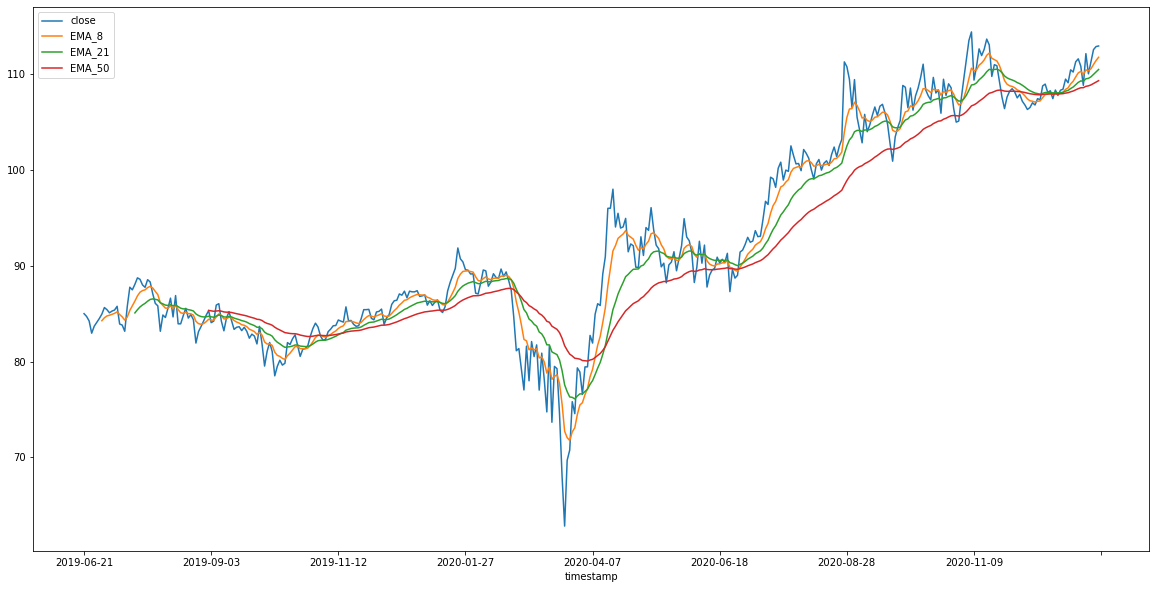

In [10]:
asset[["close", "EMA_8", "EMA_21", "EMA_50"]].plot()

### Trend Returns and Cumulative Trend Returns

In [11]:
long = ta.ema(asset.close, 8) > ta.ema(asset.close, 21)
trendy = asset.ta.trend_return(trend=long, cumulative=True, trade_offset=-1, append=True)
trendy.tail() # Third Column is the long trend; binary sequences

,CLTR,TR_LOGRET,CLTR_Trends,CLTR_Trades
timestamp,,,,
2021-01-14,0.015662,-0.018993,1,0
2021-01-15,0.027047,0.011385,1,0
2021-01-19,0.038393,0.011346,1,0
2021-01-20,0.041232,0.002839,1,0
2021-01-21,0.041763,0.000531,1,0


### Join

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html

<AxesSubplot:xlabel='timestamp'>

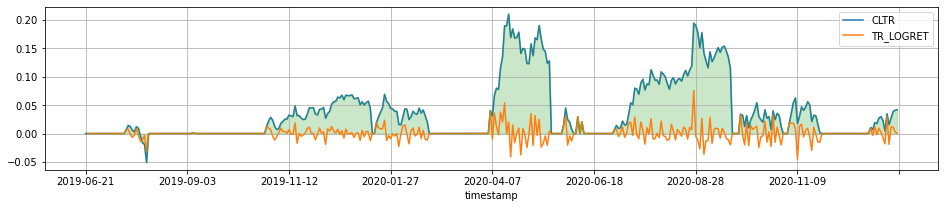

In [12]:
cltr = trendy.iloc[:,0]
tr = trendy.iloc[:,1]

trendy.iloc[:,:2].plot(figsize=(16, 3))
cltr.plot(figsize=(16, 3), kind="area", stacked=False, alpha=0.25, grid=True)

<AxesSubplot:xlabel='timestamp'>

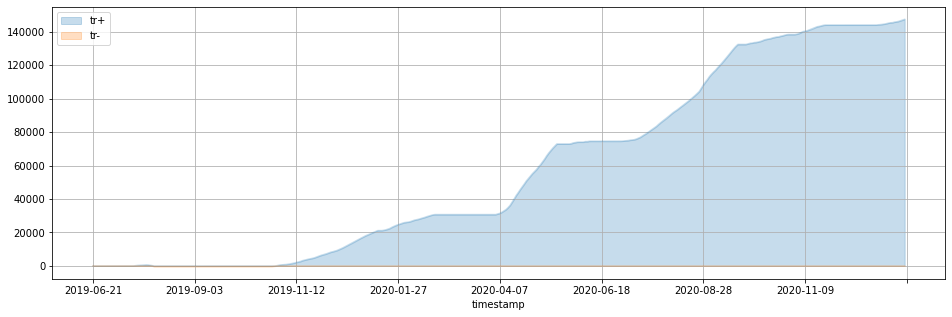

In [13]:
capital = 10000

total_return = cltr.cumsum() * capital
positive_return = total_return[total_return > 0]
negative_return = total_return[total_return <= 0]
trdf = pd.DataFrame({"tr+": positive_return, "tr-": negative_return})
trdf.plot(figsize=(16, 5), kind="area", stacked=False, alpha=0.25, grid=True)

<AxesSubplot:xlabel='timestamp'>

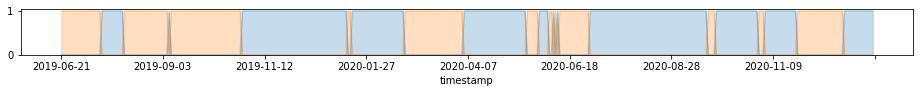

In [14]:
long_trend = (trendy.iloc[:,-2] > 0).astype(int)
short_trend = (1 - long_trend).astype(int)

long_trend.plot(figsize=(16, 0.85), kind="area", stacked=True, alpha=0.25)
short_trend.plot(figsize=(16, 0.85), kind="area", stacked=True, alpha=0.25)

In [15]:
entries = (trendy.iloc[:,-1] > 0).astype(int) * asset.close
entries[entries < 0.0001] = np.nan
entries.name = "Entry"

exits = (trendy.iloc[:,-1] < 0).astype(int) * asset.close
exits[exits < 0.0001] = np.nan
exits.name = "Exit"

total_trades = trendy.iloc[:,-1].abs().sum()
print(f"Total Trades: {total_trades}")

all_trades = trendy.iloc[:,-1].copy().fillna(0)
all_trades = all_trades[all_trades != 0]

trades = pd.DataFrame({"Signal": all_trades, entries.name: entries.dropna(), exits.name: exits.dropna()})
trades['PnL'] = (trades.Exit - trades.Entry.shift(1))  / trades.Entry.shift(1)

Total Trades: 23


In [16]:
(1 + trades.PnL).prod()

1.3871892209930559

In [17]:
trades

,Signal,Entry,Exit,PnL
timestamp,,,,
2019-07-19,1,87.49,NaN,NaN
2019-08-05,-1,NaN,83.16,-0.049491
2019-09-05,1,85.90,NaN,NaN
2019-09-06,-1,NaN,86.04,0.001630
2019-10-25,1,81.65,NaN,NaN
2020-01-10,-1,NaN,85.36,0.045438
2020-01-14,1,85.74,NaN,NaN
2020-02-21,-1,NaN,87.45,0.019944
2020-04-02,1,79.44,NaN,NaN


In [18]:
asset.close - asset.close.shift(1)

timestamp
2019-06-21     NaN
2019-06-24   -0.29
2019-06-25   -0.47
2019-06-26   -1.28
2019-06-27    0.73
              ... 
2021-01-14   -2.11
2021-01-15    1.26
2021-01-19    1.27
2021-01-20    0.32
2021-01-21    0.06
Name: close, Length: 400, dtype: float64

<AxesSubplot:xlabel='timestamp'>

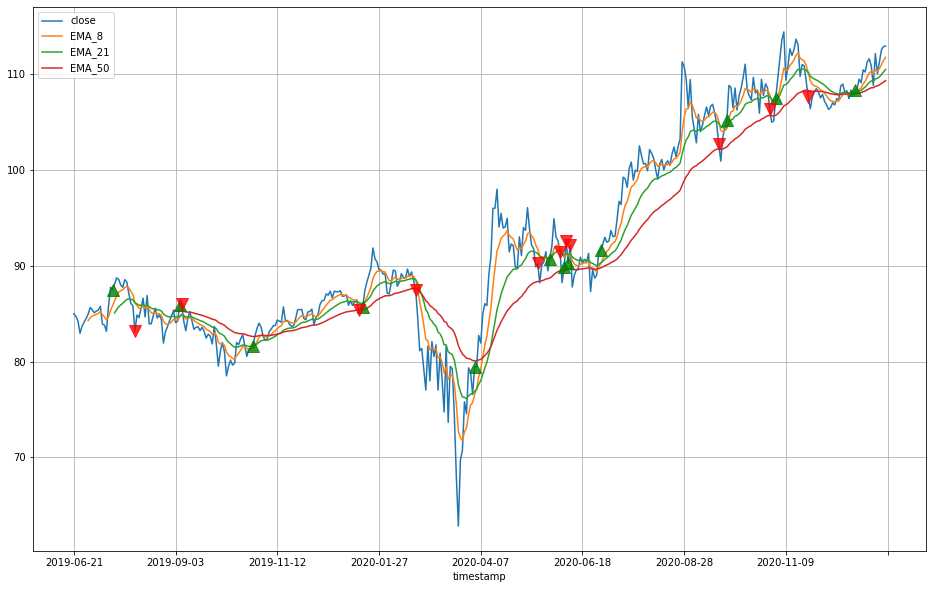

In [19]:
# chart = asset["close"] #asset[["close", "SMA_10", "SMA_20", "SMA_50", "SMA_200"]]
# chart = asset[["close", "SMA_10", "SMA_20"]]
chart = asset[["close", "EMA_8", "EMA_21", "EMA_50"]]
chart.plot(figsize=(16, 10), grid=True)
entries.plot(figsize=(16, 10), marker="^", color='green', markersize=12, alpha=0.8)
exits.plot(figsize=(16, 10), marker="v", color='#FF0000', markersize=12, alpha=0.8, grid=True)